In [22]:
import time
from collections import Counter
import pandas as pd
import numpy
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, \
    precision_recall_curve
import xgboost as xgb
from sklearn.utils.multiclass import unique_labels
# import shap
from xgboost import plot_tree
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import pickle
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [2]:
def get_dataset(filename):
    import pandas as pd

    csv_file = filename
    df = pd.read_csv(csv_file)
    
    Y = df['FLAG']
    X = df.loc[:, df.columns != 'FLAG']
    X.pop('Index')
    X.pop('ERC20_most_sent_token_type')
    X.pop('ERC20_most_rec_token_type')
    X.pop('ERC20_uniq_sent_token_name')
    X.pop('ERC20_uniq_rec_token_name')
    #X.pop('Address')

    X.fillna(0, inplace=True)
    return X, Y

In [3]:
X, Y = get_dataset('./Complete.csv')

/var/folders/db/q45d2_5d0c52zkvrdw9tp0xm0000gn/T/ipykernel_72834/3010327854.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [4]:
df = pd.read_csv('./Complete.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4681 entries, 0 to 4680
Data columns (total 50 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Index                                                  4681 non-null   int64  
 1   Address                                                4681 non-null   object 
 2   FLAG                                                   4681 non-null   int64  
 3   Avg_min_between_sent_tnx                               4681 non-null   float64
 4   Avg_min_between_received_tnx                           4681 non-null   float64
 5   Time_Diff_between_first_and_last_(Mins)                4681 non-null   float64
 6   Sent_tnx                                               4681 non-null   int64  
 7   Received_Tnx                                           4681 non-null   int64  
 8   Number_of_Created_Contracts                     

In [5]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
4676    0
4677    0
4678    0
4679    0
4680    0
Name: FLAG, Length: 4681, dtype: int64

In [6]:
test_size = 0.14

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, stratify=Y, shuffle=True)
print("Size of Training: ", len(X_train))
print("Size of Testing: ", len(X_test))

Size of Training:  4025
Size of Testing:  656


In [7]:
model2 = xgb.XGBClassifier(n_estimators=300, max_depth=4, learning_rate=0.2, subsample=0.5, objective='binary:logistic')

X_train = X_train.loc[:, X_train.columns != 'Address']
X_test_addresses = X_test['Address']
X_test = X_test.loc[:, X_test.columns != 'Address']
X_test_addresses = np.array(X_test_addresses)


In [8]:

#train_model1 = model1.fit(X_train, y_train)
for i in range(10):
    train_model2 = model2.fit(X_train, y_train,eval_metric='rmse')
pred2 = train_model2.predict(X_test)



/Users/gayuhkautaman/miniforge3/envs/dataMining/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gayuhkautaman/miniforge3/envs/dataMining/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [10]:
file_name = "xgb_reg.pkl"
pickle.dump(model2, open(file_name, "wb"))

In [11]:
model2.score(X_test,y_test)

/Users/gayuhkautaman/miniforge3/envs/dataMining/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.9496951219512195

Load Model

In [12]:
modelXGBoost = pickle.load(open("xgb_reg.pkl","rb"))

Normal = 0
Illicit = 1

In [13]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, stratify=Y, shuffle=True)

prediction = modelXGBoost.predict(X_test)
prediction

/Users/gayuhkautaman/miniforge3/envs/dataMining/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [14]:
result = pd.DataFrame({
    'Address': X_test_addresses,
    'prediction':prediction,
    'label':y_test
    })

In [15]:
result = pd.concat([result,X_test],axis=1,join="inner")

In [16]:
result

,Address,prediction,label,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,...,ERC20_avg_time_between_contract_tnx,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_min_val_sent_contract,ERC20_max_val_sent_contract,ERC20_avg_val_sent_contract
1436,0xa676cc0708e115122fc2d8401435254d47dc38df,1,1,0.00,0.00,0.00,0,0,0,0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
2456,0x36459e1f2a115bf720140314e8e212b57aefc8fa,0,0,15.61,19327.87,96717.38,5,5,0,1,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
1101,0x7fe5f97dd063f39386207bcc27b5581b3ef2e600,1,1,0.00,0.00,0.00,1,0,0,0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
1219,0x8c38a4e5104a2925d9e23d5f269afd1c2e09b8f9,1,1,2299.64,808.98,18906.27,4,12,0,10,...,0.0,2.077186,2.077186,2.077186,0.0,0.0,0.00000,0.0,0.0,0.0
4100,0x8c7d635508d48fa658fac1b338570dadf6690154,1,0,1357.20,34580.69,355307.23,7,10,0,6,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3408,0xfd6fd442937e8127fb44a4ff9466bdd76c13715d,0,0,3.19,0.47,323.35,101,3,0,3,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
286,0x1e21312d1e05a13a7d4af51fff776b93d5324111,1,1,16867.04,319.45,52837.30,3,7,0,7,...,0.0,13.370000,99.000000,56.185000,0.0,0.0,0.00000,0.0,0.0,0.0
2377,0x26b4637996c579d9239970aa1f80172094cc621d,0,0,17.76,0.51,72.05,4,2,0,2,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
624,0x4684d57d2fe38b7990d6d82760922da0928e4eda,1,1,0.00,269.50,206082.30,1,10,0,10,...,0.0,0.000000,1.337000,0.334250,0.0,0.0,0.00000,0.0,0.0,0.0


In [17]:
result['prediction'] = result['prediction'].map({1:'Illicit',0:'Normal'})
result['label'] = result['label'].map({1:'Illicit',0:'Normal'})


In [18]:
result

,Address,prediction,label,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,...,ERC20_avg_time_between_contract_tnx,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_min_val_sent_contract,ERC20_max_val_sent_contract,ERC20_avg_val_sent_contract
1436,0xa676cc0708e115122fc2d8401435254d47dc38df,Illicit,Illicit,0.00,0.00,0.00,0,0,0,0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
2456,0x36459e1f2a115bf720140314e8e212b57aefc8fa,Normal,Normal,15.61,19327.87,96717.38,5,5,0,1,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
1101,0x7fe5f97dd063f39386207bcc27b5581b3ef2e600,Illicit,Illicit,0.00,0.00,0.00,1,0,0,0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
1219,0x8c38a4e5104a2925d9e23d5f269afd1c2e09b8f9,Illicit,Illicit,2299.64,808.98,18906.27,4,12,0,10,...,0.0,2.077186,2.077186,2.077186,0.0,0.0,0.00000,0.0,0.0,0.0
4100,0x8c7d635508d48fa658fac1b338570dadf6690154,Illicit,Normal,1357.20,34580.69,355307.23,7,10,0,6,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3408,0xfd6fd442937e8127fb44a4ff9466bdd76c13715d,Normal,Normal,3.19,0.47,323.35,101,3,0,3,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
286,0x1e21312d1e05a13a7d4af51fff776b93d5324111,Illicit,Illicit,16867.04,319.45,52837.30,3,7,0,7,...,0.0,13.370000,99.000000,56.185000,0.0,0.0,0.00000,0.0,0.0,0.0
2377,0x26b4637996c579d9239970aa1f80172094cc621d,Normal,Normal,17.76,0.51,72.05,4,2,0,2,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
624,0x4684d57d2fe38b7990d6d82760922da0928e4eda,Illicit,Illicit,0.00,269.50,206082.30,1,10,0,10,...,0.0,0.000000,1.337000,0.334250,0.0,0.0,0.00000,0.0,0.0,0.0


In [19]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    print(tn, fp, fn, tp)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    fig.savefig('Boost.png')
    return ax



Confusion matrix, without normalization
[[337  14]
 [ 19 286]]
337 14 19 286


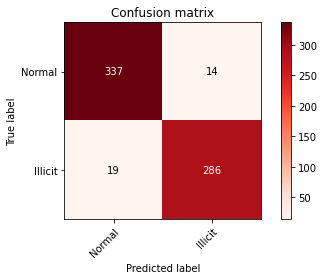

In [21]:
cnf_matrix = plot_confusion_matrix(y_test, prediction, classes=np.array(['Normal','Illicit']),
                        title='Confusion matrix')

In [23]:
score = metrics.roc_auc_score(y_test,prediction )

print(f'Area under ROC of Model On Test Set - {score:,.2%}')



Area under ROC of Model On Test Set - 94.89%


In [24]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test,prediction)

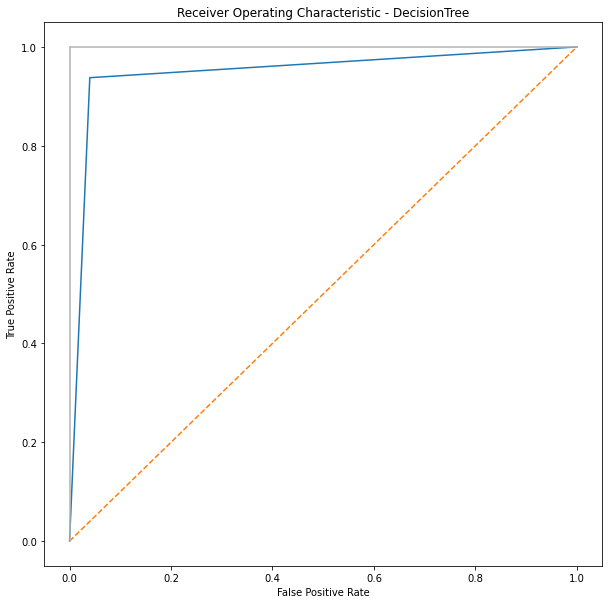

In [25]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC.jpg')
plt.show()